<font size="10">**Anish Karnik (21110098) ES 335 Prerequsite Exam**</font>

*Q.1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.*

Ans 1: The total number of multiplications would be (n * k * m) and the total number of additions would be (n * (k-1) * m).  

Explanation:
$$
\left(\begin{array}{cc} 
 a\\
 b
\end{array}\right)
\left(\begin{array}{cc} 
c & d\\ 
\end{array}\right)
$$ 
Multiplication: 
For a single row and single column, the multiplications required for this matrix will be 2, i.e, (number of cols of Mat1 or number of rows of Mat2). Here it is k. 
We have to repeat this for m columns for a single row. Hence, multiplications will be k*m.
If we have n such rows stacked, the total total multiplications become (n * k * m).    

Addition:
For a single row and single column, the additions required for this matrix will be 1, i.e, (number of cols of Mat1 - 1 or number of rows of Mat2 -1). Here it is k-1. 
We have to repeat this for m columns for a single row. Hence, additions will be (k-1)*m.
If we have n such rows stacked, the total total additions become (n * (k-1) * m).

*Q.2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?*

In [10]:
import numpy as np
import time

n=int(200)
k=int(500)
m=int(600)
# A=[[1,2,3],[4,5,6]]
# B=[[1,2,3,4],[5,6,7,8],[9,10,11,12]]
# C=[[0,0,0,0],[0,0,0,0]]

A= np.random.rand(n,k) 
B= np.random.rand(k,m)
C=np.zeros((n,m))

start_time = time.time()
# print(round(start_time,7))
for i in range(0,n):
    for j in range(0,m):
        for x in range(0,k):
            C[i][j]+=A[i][x]*B[x][j]
end_time = time.time()
# print(end_time)
time_taken = end_time - start_time
print("Time taken: ", time_taken)         
# print(C)


start_time = time.time()
D=np.dot(A,B)
end_time = time.time()
time_taken = (end_time - start_time)
print("Time taken: ", time_taken)   

# print(D)

Time taken:  34.76956868171692
Time taken:  0.0009534358978271484


*Q.3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?*

Ans 3: For a single pass of array we require O(n) steps. To find median we require such n/2 steps. Hence, the time complexity would be O($n^2$/2). A better method would be to sort the list and select the middle element. This solution requires a O(nlogn) time complexity.

In [11]:
import sys
def func1(list):
    if(len(list)%2==1):
        for i in range (int(len(list)/2)):
            maxi=-sys.maxsize-1
            index=-1
            for j in range(len(list)):
                if(maxi<list[j]):
                    index=j
                    maxi=list[j]
            # list[index]=-sys.maxsize-1
            list=np.delete(list,index)
        maxi=-sys.maxsize-1
        index=-1
        for j in range(len(list)):
            if(maxi<list[j]):
                    index=j
                    maxi=list[j]
        return maxi
    else:
        for i in range (0,int(len(list)/2)-1):
            maxi=-sys.maxsize-1
            index=-1
            for j in range(len(list)):
                if(maxi<list[j]):
                    index=j
                    maxi=list[j]
            # list[index]=-sys.maxsize-1
            list=np.delete(list,index)
        maxi=-sys.maxsize-1
        index=-1
        ans=0
        for j in range(len(list)):
            if(maxi<list[j]):
                    index=j
                    maxi=list[j]
        # list[index]=-sys.maxsize-1
        list=np.delete(list,index)
        ans+=maxi
        maxi=-sys.maxsize-1
        index=-1
        for j in range(len(list)):
            if(maxi<list[j]):
                    index=j
                    maxi=list[j]
        ans+=maxi
        return ans/2
        
def func2(list):
    list.sort()
    if(len(list)%2==1):
        return list[int(len(list)/2)]
    else:
        return (list[int(len(list)/2)-1]+list[int(len(list)/2)])/2
    # return list
list1=np.random.rand(10000) 
start_time = time.time()
ans1a=func1(list1)
end_time = time.time()
elapsed_time1 = end_time - start_time

start_time = time.time()
ans1b=func2(list1)
end_time = time.time()
elapsed_time2 = end_time - start_time

start_time = time.time()
ans1c=np.median(list1)
end_time = time.time()
elapsed_time3 = end_time - start_time


print("Elapsed time for func1: ", elapsed_time1)    
print("Elapsed time for func2: ", elapsed_time2)    
print("Elapsed time for np.median: ", elapsed_time3)    

Elapsed time for func1:  2.6167216300964355
Elapsed time for func2:  0.001005411148071289
Elapsed time for np.median:  0.001976490020751953


Q.4 What is the gradient of the following function with respect to x and y?  
$x^2y + y^3sin(x)$

Ans 3: $ f = x^2 + y^3sin(x)$  
       $\frac{\partial f}{\partial x}$=$2xy + y^3cos(x)$  
       $\frac{\partial f}{\partial y}$=$x^2 + 3y^2sin(x)$  
          $ \nabla f = (2xy + y^3cos(x))i + (x^2 + 3y^2sin(x))j $


*Q.5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y*

In [48]:
import jax
import jax.numpy as jnp

def jax_func(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_func(x, y):
    a=2*x*y + (y**3)*jnp.cos(x)
    b=x**2 + 3*(y**2)*jnp.sin(x)
    z=complex(a,b)
    return z

grad_f = jax.grad(jax_func, argnums=(0, 1))
x0= np.random.rand()
y0= np.random.rand()
gradient_at_point = grad_f(x0, y0)
ans=analytical_func(x0,y0)

print("Gradient at (2, 3) using JAX:", complex(gradient_at_point[0],gradient_at_point[1]))
print("Analytical Solution: " ,ans)

Gradient at (2, 3) using JAX: (2.111384153366089+2.8205344676971436j)
Analytical Solution:  (2.111384153366089+2.8205344676971436j)


*Q.6 Use sympy to confirm that you obtain the same gradient analytically.*

In [49]:
from sympy import *

x,y=symbols('x y')
func=x**2 * y + (y**3)*(sin(x))

def sympy_func(a,b):
    p=diff(x**2 * y + (y**3)*(sin(x)),x )
    c=p.subs({x:a,y:b})
    q=diff(x**2 * y + (y**3)*(sin(x)),y )
    d=q.subs({x:a,y:b})
    z=complex(c,d)
    return z
    
# sympy_func(2,3)
print("Gradient at (2, 3) using Sympy:",sympy_func(2,3) )
print("Analytical Solution: " ,analytical_func(2,3))

Gradient at (2, 3) using Sympy: (0.7640354132271555+28.551030524293406j)
Analytical Solution:  (0.7640352249145508+28.551029205322266j)


Q.7 *Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:  
2022  
Branch 1  
Roll Number: 1, Name: N, Marks:  
Maths: 100, English: 70 …  
Branch 2  
2023  
Branch 1  
Branch 2  
2024  
Branch 1  
Branch 2  
2025  
Branch 1  
Branch 2*

In [42]:
student_records={"2022":{"Branch1":{"1":{"Roll No":1,"Name":N,"Marks":{"Maths":100,"English":70}}},"Branch2":{}},
                 "2023":{"Branch1":{},"Branch2":{}},
                 "2024":{"Branch1":{},"Branch2":{}},
                 "2025":{"Branch1":{},"Branch2":{}}}
student_records

{'2022': {'Branch1': {'1': {'Roll No': 1,
    'Name': <function sympy.core.evalf.N(x, n=15, **options)>,
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch2': {}},
 '2023': {'Branch1': {}, 'Branch2': {}},
 '2024': {'Branch1': {}, 'Branch2': {}},
 '2025': {'Branch1': {}, 'Branch2': {}}}

*Q.8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.*

In [7]:
class student:
    def __init__(self,rn,name,marks):
        self.roll_no=rn
        self.marks=marks
        self.name=name

class branch:
    def __init__(self,branch_number):
        self.branch_number=branch_number
        self.students=[]
    
    def add(self,student):
        self.students.append(student)
        
class year:
    def __init__(self,year_number):
        self.year_number=year_number
        self.branches=[]
        
    def add(self,branch):
        self.branches.append(branch)

class database:
    def __init__(self):
        self.years=[]
    
    def add(self,year):
        self.years.append(year)

*Q.9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.*

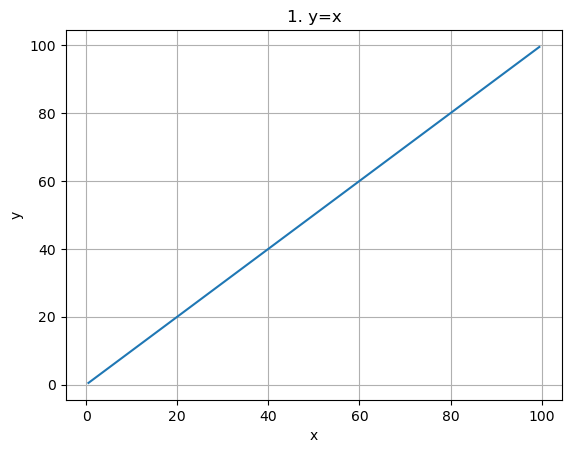

In [14]:
import matplotlib.pyplot as plt
#(1)
x=np.arange(0.5,100,0.5)
y=x
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "1. y=x" )
ax.grid()
plt.show()

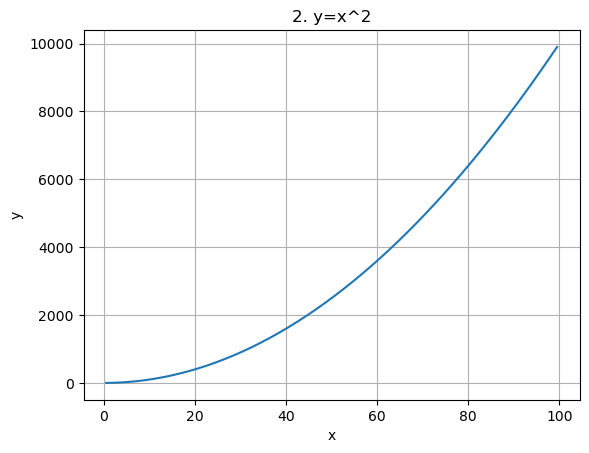

In [15]:
#(2)
x=np.arange(0.5,100,0.5)
y=x**2
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "2. y=x^2" )
ax.grid()
plt.show()

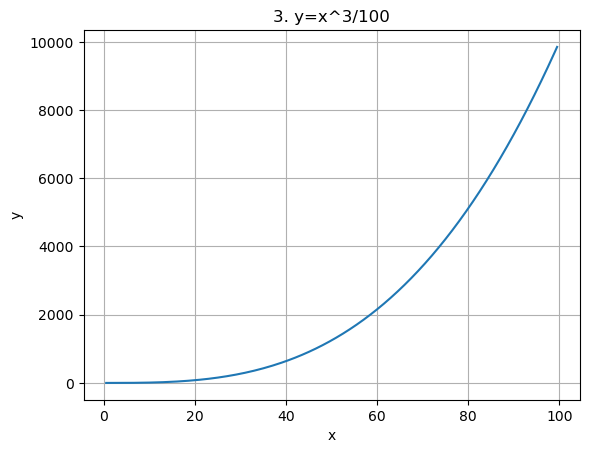

In [16]:
#(3)
x=np.arange(0.5,100,0.5)
y=(x**3)/100
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "3. y=x^3/100" )
ax.grid()
plt.show()

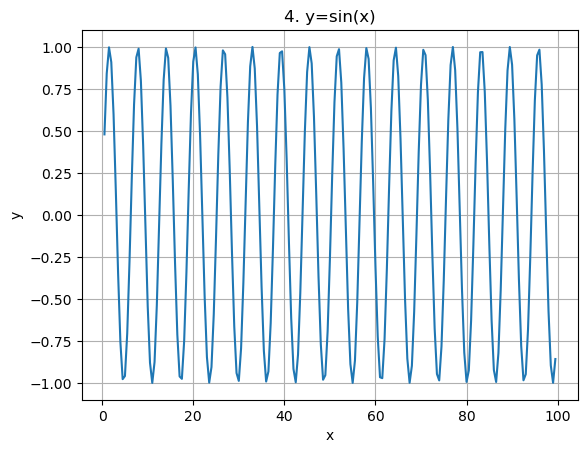

In [17]:
#(4)
x=np.arange(0.5,100,0.5)
y=np.sin(x)
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "4. y=sin(x)" )
ax.grid()
plt.show()

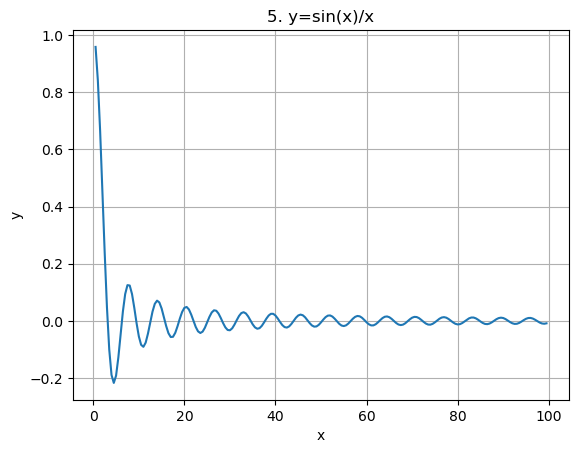

In [18]:
#(5)
x=np.arange(0.5,100,0.5)
y=np.sin(x)/x
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "5. y=sin(x)/x" )
ax.grid()
plt.show()

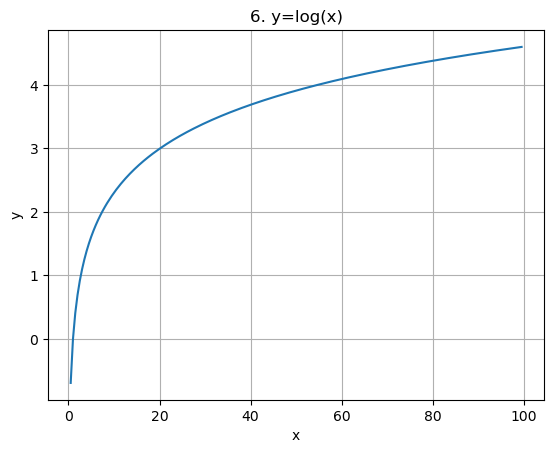

In [19]:
#(6)
x=np.arange(0.5,100,0.5)
y=np.log(x)
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "6. y=log(x)" )
ax.grid()
plt.show()

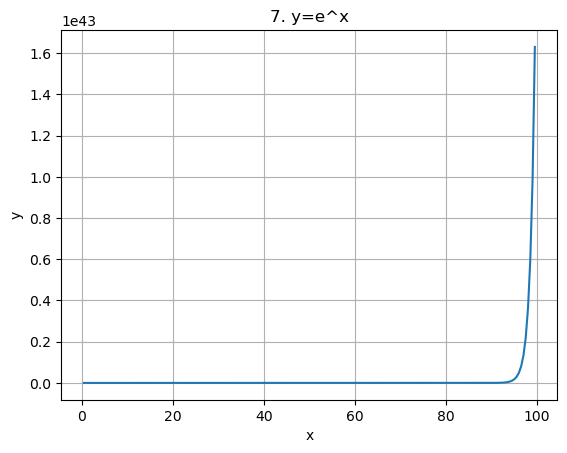

In [20]:
#(7)
x=np.arange(0.5,100,0.5)
y=np.exp(x)
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title= "7. y=e^x" )
ax.grid()
plt.show()

*Q.10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.*

In [46]:
import pandas as pd
A = np.random.uniform(low=1, high=2, size=(20,5))
#print(A)
df=pd.DataFrame(A,columns=['a','b','c','d','e'])
#print(df)
# print(df.std(axis = 0))
print(df.std())
maxi=0
col='a'
max_col='a'
for i in (df.std(axis=0)):
    if(maxi<i):
        maxi=i
        max_col=col
    col=chr(ord(col) + 1)
print("Hence, column with highest standard deviation is :",max_col)



print(df.mean(axis = 1))
mini=sys.maxsize
row=0
min_row=0
for i in (df.mean(axis=1)):
    if(mini>i):
        mini=i
        min_row=row
    row=row+1
print("Hence, row with lowest mean is :",min_row)

a    0.329489
b    0.283442
c    0.279261
d    0.244601
e    0.269250
dtype: float64
Hence, column with highest standard deviation is : a
0     1.363533
1     1.483167
2     1.406970
3     1.573020
4     1.668332
5     1.245058
6     1.547228
7     1.595159
8     1.543336
9     1.336275
10    1.489445
11    1.504406
12    1.326220
13    1.431385
14    1.475880
15    1.420954
16    1.356209
17    1.811257
18    1.668238
19    1.447631
dtype: float64
Hence, row with lowest mean is : 5


*Q.11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.*

In [47]:
df['f']=df.sum(axis=1)
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')
rows=(df['g']=='LT8').sum()
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print(rows)
print(std_lt8)
print(std_gt8)
print(df)

17
0.4834682836180232
0.4127264546859736
           a         b         c         d         e         f    g
0   1.296872  1.366656  1.296053  1.785069  1.073014  6.817663  LT8
1   1.164341  1.553058  1.987120  1.328977  1.382337  7.415833  LT8
2   1.256471  1.824213  1.250653  1.054065  1.649449  7.034851  LT8
3   1.896070  1.761280  1.395741  1.239607  1.572402  7.865099  LT8
4   1.451360  1.456866  1.990376  1.862639  1.580417  8.341658  GT8
5   1.001789  1.080096  1.370615  1.586009  1.186781  6.225290  LT8
6   1.715618  1.359618  1.428341  1.764516  1.468045  7.736138  LT8
7   1.259058  1.994880  1.750195  1.372995  1.598666  7.975793  LT8
8   1.381534  1.450989  1.533250  1.575804  1.775101  7.716678  LT8
9   1.063713  1.255569  1.082837  1.423564  1.855692  6.681374  LT8
10  1.915745  1.200027  1.585295  1.187824  1.558334  7.447226  LT8
11  1.124067  1.470004  1.449261  1.640496  1.838204  7.522032  LT8
12  1.217025  1.329405  1.043236  1.768502  1.272931  6.631099  LT8
13  1.7

*Q.12 Write a small piece of code to explain broadcasting in numpy.* 

Ans 12. Broadcasting can be used to do matrix operations like addition, subtraction, multiplication, exponentiation for matrices of different shapes using a set of rules. If these rules are not followed opeartions can't be performed. The rules are if x, y have a different number of dimensions, prepend 1's to the shape of the shorter and all other axes must have matching lengths.

In [39]:
x = np.array([[1, 2,3 ],
              [4,5 ,6 ],
              [7,8 ,9 ]])
# x has shape (3,3)
y = np.array([1, 2, 3]).reshape(3, 1)
# y has shape (3,1)

print(x + y)
#The result will be a matrix of size (3,3) which would form by prepending ones to shape of y. We have a match between the rows of x and y. All the rules are satisfied so broadcasting can be done.
shape = (3, 3)
ans = np.empty(shape, dtype=int)
N0, N1 = shape
#Showing the functioning of broadcasting using for loop
for i in range(N0):
    for j in range(N1):
        ans[i, j] = x[i, j] + y[i, 0]
print(ans)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [40]:
x=np.array([[1,2,3]])
# x has shape (1,3)
y = np.array([1, 2, 3]).reshape(3, 1)
# y has shape (3,1)

print(x + y)
#The result will be a matrix of size (3,3) which would form by prepending ones to shape of both x and y. After prepending, both have the same shape. All the rules are satisfied so broadcasting can be done.
shape = (3, 3)
ans = np.empty(shape, dtype=int)
N0, N1 = shape
#Showing the functioning of broadcasting using for loop
for i in range(N0):
    for j in range(N1):
        ans[i, j] = x[0, i] + y[j, 0]
print(ans)

[[2 3 4]
 [3 4 5]
 [4 5 6]]
[[2 3 4]
 [3 4 5]
 [4 5 6]]


*Q.13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.*

In [41]:
arr=np.random.rand(100)

def func(arr):
    min=sys.maxsize
    index=-1
    for i in range (0,len(arr)):
        if(min>arr[i]):
            min=arr[i]
            index=i
    return index
print(arr)
ans=func(arr)
ans_argmin=np.argmin(arr)
print("Our solution: ",ans)        
print("Verification: ",ans_argmin)

[0.26690516 0.66060147 0.36040619 0.92156964 0.63031398 0.9325567
 0.40301516 0.87124804 0.95977532 0.50096039 0.57861674 0.09534523
 0.81753926 0.41792091 0.2548878  0.69235788 0.18280524 0.18201027
 0.48885234 0.55876405 0.11747764 0.89551517 0.82576917 0.10049078
 0.39056883 0.52053647 0.08708683 0.72694686 0.04590033 0.76039037
 0.28170756 0.33083202 0.68456595 0.77475922 0.50638422 0.98313598
 0.83213874 0.19821729 0.61556547 0.66754001 0.7855843  0.734881
 0.54833851 0.45997701 0.27059249 0.15668451 0.17239277 0.37214139
 0.3026236  0.97245739 0.52020297 0.34943248 0.36587392 0.98187982
 0.3149213  0.13417727 0.78443009 0.76629679 0.33778383 0.33002679
 0.29680025 0.5379738  0.11889436 0.71039901 0.83486203 0.92434887
 0.75735541 0.45796816 0.40296608 0.06676889 0.43673512 0.91575365
 0.10939608 0.7470407  0.79164639 0.63588945 0.75739178 0.5438535
 0.48304705 0.71805087 0.14109258 0.4654915  0.55754919 0.41948761
 0.61124691 0.00916139 0.5697647  0.65632037 0.42874938 0.23716842